# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here
data = pd.read_csv("5_a.csv")

data["pred"] = data["proba"].apply(lambda x: 1 if x > 0.5 else 0)
print(data.shape)

(10100, 3)


In [3]:
#confussion matrix

def confusion_matrix(data):
    
    #https://stackoverflow.com/a/27475514
    true_positive = len(np.where((data["y"] == 1) & (data["pred"] == 1))[0])
    true_negative = len(np.where((data["y"] == 0) & (data["pred"] == 0))[0])
    false_positive = len(np.where((data["y"] == 0) & (data["pred"] == 1))[0])
    false_negative = len(np.where((data["y"] == 1) & (data["pred"] == 0))[0])
    
    return true_positive, true_negative, false_positive, false_negative

def confusion_matrix_print(data):
    
    true_positive, true_negative, false_positive, false_negative = confusion_matrix(data)
    
    result_format = {"n = 10100": ["Actual: 0", "Actual: 1"],
              "Predicted: 0": ["(tn)" + str(true_negative),"(fn)" + str(false_negative)],
              "Predicted: 1": ["(fp)" + str(false_positive),"(tp)" + str(true_positive)]
              }
    
    result = pd.DataFrame(result_format)

    print("Confusion Matrix:")
    print(result.to_string(index=False))

In [4]:
def f1_score(data):
    
    tp, tn, fp, fn = confusion_matrix(data)
    
    precision = tp / (tp+fp)
    recall = tp / (tp+fn)
    
    f1 = 2 * ((precision*recall) / (precision+recall))
    
    return f1

In [5]:
def accuracy_score(data):
    
    tp, tn, fp, fn = confusion_matrix(data)
    
    acc = (tp+tn) / (tp+tn+fp+fn)
    
    return acc

In [6]:
from tqdm import tqdm

def auc_score(data):

    unique_prob_score = list(sorted(set(data["proba"]), reverse = True))
    tpr_list = []
    fpr_list = []

    for threshold in tqdm(range(len(unique_prob_score))):

        #https://stackoverflow.com/a/10726275
        data["pred"] = np.where(data['proba'] <= unique_prob_score[threshold],0 , 1)
        tp, tn, fp, fn = confusion_matrix(data)
        data.drop("pred", axis=1)
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        
    plt.plot(fpr_list, tpr_list)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC")    
        
    return np.trapz(tpr_list, fpr_list)

Confusion Matrix:
n = 10100 Predicted: 0 Predicted: 1
Actual: 0        (tn)0      (fp)100
Actual: 1        (fn)0    (tp)10000


f1 score: 0.9950248756218906


accuracy: 0.9900990099009901




100%|██████████| 10100/10100 [00:26<00:00, 379.43it/s]


auc score: 0.48829900000000004


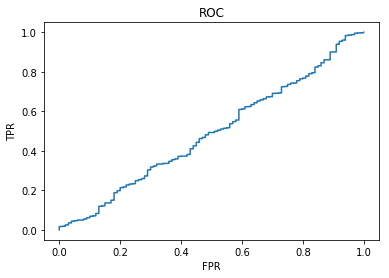

In [7]:
confusion_matrix_print(data)
print("\n")
print("f1 score:",f1_score(data))
print("\n")
print("accuracy:",accuracy_score(data))
print("\n")
print("auc score:",auc_score(data))



<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [8]:
data_B = pd.read_csv("5_b.csv")
data_B["pred"] = data_B["proba"].apply(lambda x: 1 if x > 0.5 else 0)

Confusion Matrix:
n = 10100 Predicted: 0 Predicted: 1
Actual: 0     (tn)9761      (fp)239
Actual: 1       (fn)45       (tp)55


f1 score: 0.2791878172588833


accuracy: 0.9718811881188119




100%|██████████| 10100/10100 [00:27<00:00, 363.22it/s]


auc score: 0.9376570000000001


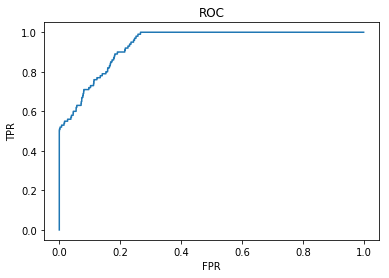

In [9]:
confusion_matrix_print(data_B)
print("\n")
print("f1 score:",f1_score(data_B))
print("\n")
print("accuracy:",accuracy_score(data_B))
print("\n")
print("auc score:",auc_score(data_B))

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [10]:
data_C = pd.read_csv("5_c.csv")
data_C["pred"] = data_C["prob"].apply(lambda x: 1 if x > 0.5 else 0)

In [11]:
from tqdm import tqdm

best_A = []

def auc_score_C(data):

    unique_proba_score = list(sorted(set(data["prob"]), reverse = True))
    tpr_list = []
    fpr_list = []

    for threshold in tqdm(range(len(unique_proba_score))):

        #https://stackoverflow.com/a/10726275
        data["pred"] = np.where(data['prob'] <= unique_proba_score[threshold],0 , 1)
        tp, tn, fp, fn = confusion_matrix(data)
        data.drop("pred", axis=1)
        
        A = 500 * fn + 100 * fp
        best_A.append((A,unique_proba_score[threshold]))
        
        tpr = tp/(tp+fn)
        fpr = fp/(fp+tn)
        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.trapz(tpr_list, fpr_list)

auc_score_C(data_C)
min_A = min(best_A)
print("best threshold is :", min_A[1])

100%|██████████| 2791/2791 [00:06<00:00, 405.10it/s]


best threshold is : 0.22987164436159915


<pre>
<font color='red'><b>D.</b></font> Compute performance metrics(for regression) for the given data <strong>5_d.csv</strong>
    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [12]:
data_D = pd.read_csv("5_d.csv")
data_D.shape

(157200, 2)

In [13]:
def mean_square(data_D):
    diff_1 = data_D["y"] - data_D["pred"]
    diff_2 = (diff_1)**2
    sum_ = diff_2.sum()
    mse = (sum_ / diff_2.count())
    return mse

In [14]:
def mape(data_D):
    diff_1 = data_D["pred"] - data_D["y"]
    diff_2 = abs(diff_1)
    diff_sum = diff_2.sum()
    y_sum = data_D["y"].sum()
    mape = diff_sum / y_sum
    return mape

In [15]:
#https://stackoverflow.com/a/895063

def r_square(data_D):
    mean_y = np.sum(data_D["y"])/len(data_D["y"]) 
    ss_res_1 = np.subtract(data_D["y"], data_D["pred"])
    ss_res_2 = np.square(ss_res_1)
    ss_res_3 = np.sum(ss_res_2)
    ss_tot_1 = np.subtract(data_D["y"], mean_y)
    ss_tot_2 = np.square(ss_tot_1)
    ss_tot_3 = np.sum(ss_tot_2)
    div = ss_res_3/ss_tot_3
    sc = 1 - div
    return sc

In [16]:
print("mean square error :", mean_square(data_D))
print("MAPE :", mape(data_D))
print("R sq error:", r_square(data_D))

mean square error : 177.16569974554707
MAPE : 0.1291202994009687
R sq error: 0.9563582786990937
